## **Loan Prediction using SVM (Support Vector Machine)**

### **Import the library**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, f1_score


### **Data preProcessing**

In [2]:
loan_df = pd.read_csv('/content/train_u6lujuX_CVtuZ9i (1).csv')

In [3]:
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
loan_df.shape

(614, 13)

In [5]:
#statistical measure
loan_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


**We just can see the statistical measure from numerical data, not the text data**

In [6]:
#check  the missing value in each columns
loan_df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [7]:
#drop the missing value
loan_df = loan_df.dropna()

In [8]:
#check again the missing value
loan_df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


**Encoding**

Encoding dalam machine learning adalah proses mengonversi data kategori (non-numerik) menjadi format numerik agar bisa digunakan oleh algoritma machine learning. Sebagian besar model hanya bisa bekerja dengan angka, sehingga data teks atau kategori harus dikonversi terlebih dahulu.

Jenis encoding

1. label encoding

2. one hot encoding
3. ordinal encoding
4. target encoding
5. binary encoding

In [9]:
#we do encoding for non numerical data

#encoding for target label

#loan_df.replace({"Loan_Status": {'N':0, 'Y':1}}, inplace= True)

loan_df['Loan_Status'] = loan_df['Loan_Status'].replace({'N': 0, 'Y': 1}).astype(int)


<ipython-input-9-92972d418d25>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_df['Loan_Status'] = loan_df['Loan_Status'].replace({'N': 0, 'Y': 1}).astype(int)
<ipython-input-9-92972d418d25>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_df['Loan_Status'] = loan_df['Loan_Status'].replace({'N': 0, 'Y': 1}).astype(int)


In [10]:
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [11]:
#check the value for each column

for col in loan_df.columns:
    print(f"Value counts for {col}:\n{loan_df[col].value_counts()}\n")


Value counts for Loan_ID:
Loan_ID
LP001003    1
LP001005    1
LP002347    1
LP002345    1
LP002342    1
           ..
LP001674    1
LP001673    1
LP001666    1
LP001665    1
LP002990    1
Name: count, Length: 480, dtype: int64

Value counts for Gender:
Gender
Male      394
Female     86
Name: count, dtype: int64

Value counts for Married:
Married
Yes    311
No     169
Name: count, dtype: int64

Value counts for Dependents:
Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

Value counts for Education:
Education
Graduate        383
Not Graduate     97
Name: count, dtype: int64

Value counts for Self_Employed:
Self_Employed
No     414
Yes     66
Name: count, dtype: int64

Value counts for ApplicantIncome:
ApplicantIncome
2500    7
4583    6
2600    5
6000    4
4166    4
       ..
3418    1
3975    1
3244    1
4408    1
7583    1
Name: count, Length: 405, dtype: int64

Value counts for CoapplicantIncome:
CoapplicantIncome
0.0       216
1666.0      5
2500.0      4

In [12]:
#change the value of dependents column

loan_df = loan_df.replace(to_replace='3+', value=4)

In [13]:
#dependents value
loan_df['Dependents'].value_counts()

,count
Dependents,
0,274
2,85
1,80
4,41


### **Data Visualization**

<Axes: xlabel='Education', ylabel='count'>

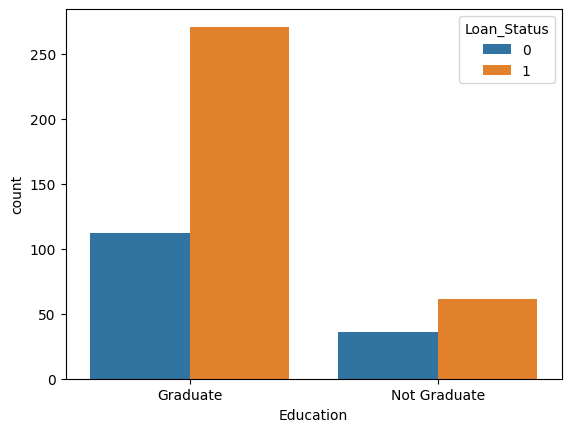

In [14]:
#Education & loan status

sns.countplot(x= 'Education', hue='Loan_Status', data= loan_df)

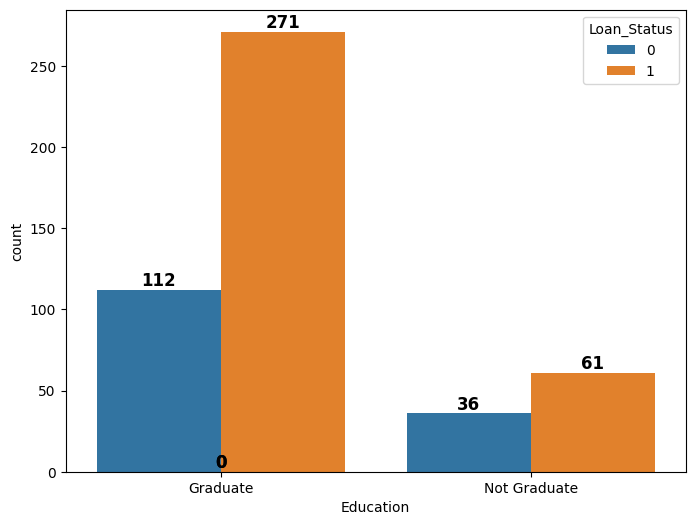

In [15]:
# Buat countplot
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Education', hue='Loan_Status', data=loan_df)

# Tambahkan angka di atas batang
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  # Ambil tinggi batang sebagai label
                (p.get_x() + p.get_width() / 2, p.get_height()),  # Posisi label
                ha='center', va='bottom',  # Posisi teks agar berada di atas batang
                fontsize=12, fontweight='bold')

# Tampilkan plot
plt.show()

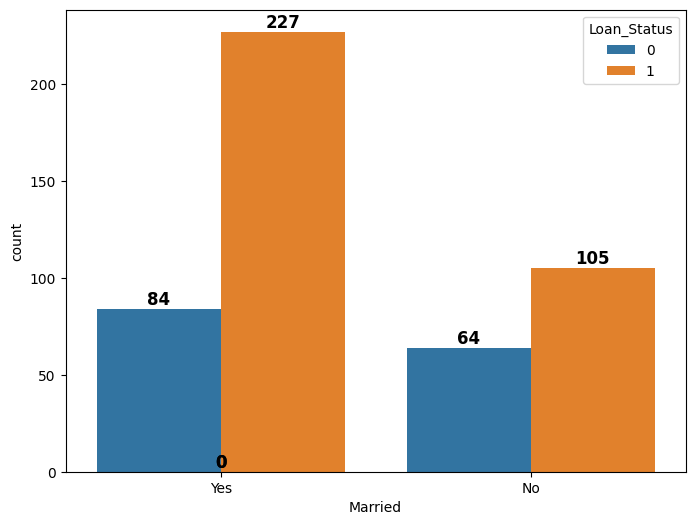

In [16]:
#make a visualization for marital & loan status

plt.figure(figsize=(8,6))
ax = sns.countplot(x='Married', hue='Loan_Status', data=loan_df)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom',
                fontsize=12, fontweight='bold')

plt.show()

In [17]:
# # make a visualization for 4 columns & loan status

# fig, axes = plt.subplots(2,2, figsize=(12, 10))

# # Plot 1: Education vs Loan_Status
# ax = sns.countplot(x='Education', hue='Loan_Status', data=loan_df, ax=axes[0,0])
# axes[0,0].set_title('Education vs Loan_Status')

# # Plot 2: Married vs Loan_Status
# ax = sns.countplot(x='Married', hue='Loan_Status', data=loan_df, ax=axes[0,1])
# axes[0,1].set_title('Married vs Loan_Status')

# # Plot 3: Gender vs Loan_Status
# ax = sns.countplot(x='Gender', hue='Loan_Status', data=loan_df, ax=axes[1,0])
# axes[1,0].set_title('Gender vs Loan_Status')

# for p in ax.patches:
#     ax.annotate(f'{int(p.get_height())}',
#                 (p.get_x() + p.get_width() / 2, p.get_height()),
#                 ha='center', va='bottom',
#                 fontsize=12, fontweight='bold')

# # Plot 4: Self_Employed vs Loan_Status
# ax = sns.countplot(x='Self_Employed', hue='Loan_Status', data=loan_df, ax=axes[1,1])
# axes[1,1].set_title('Self_Employed vs Loan_Status')

# for p in ax.patches:
#     ax.annotate(f'{int(p.get_height())}',
#                 (p.get_x() + p.get_width() / 2, p.get_height()),
#                 ha='center', va='bottom',
#                 fontsize=12, fontweight='bold')

# plt.tight_layout()
# plt.show()

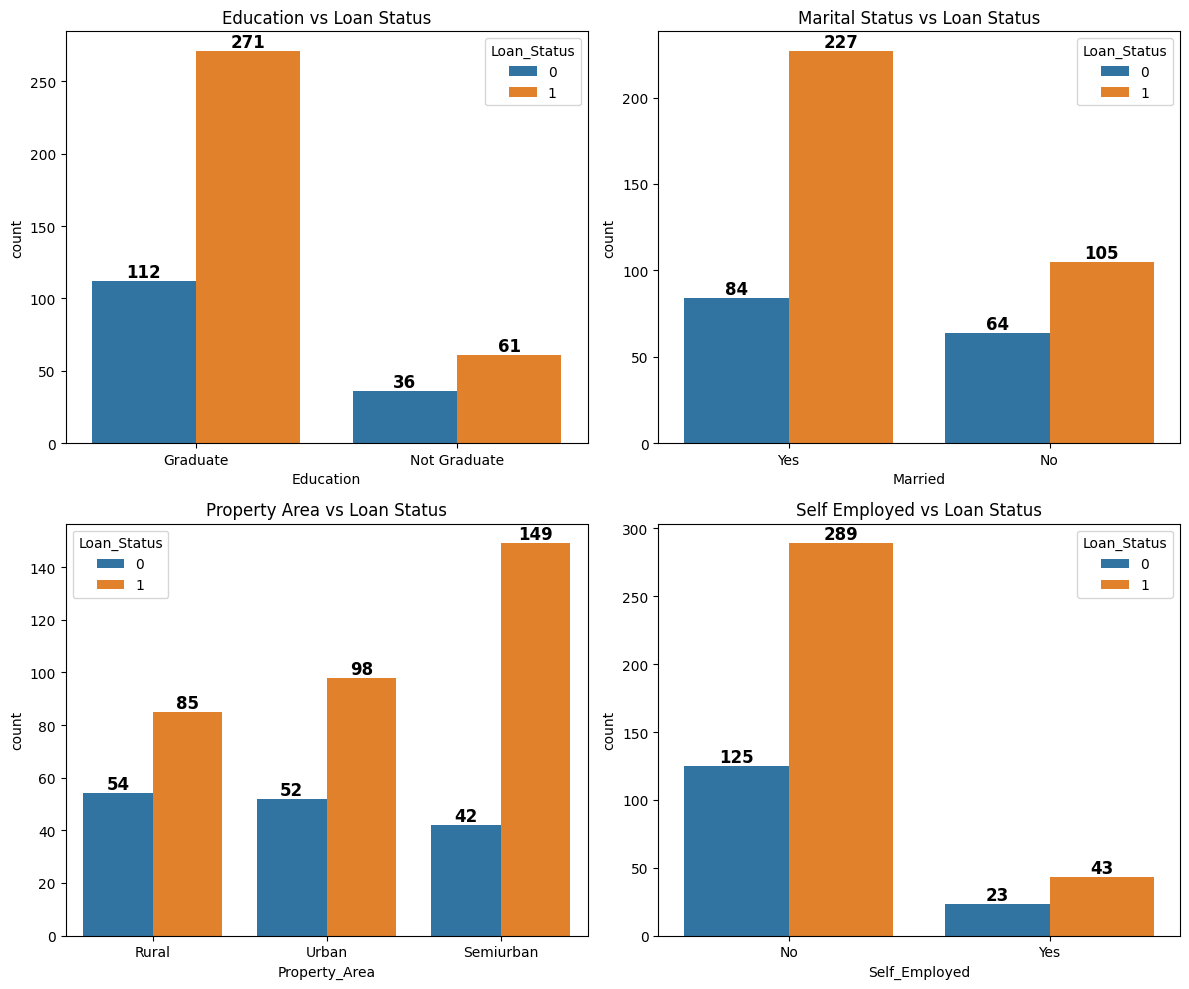

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Buat figure dan axes untuk 2x2 subplot
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2 baris, 2 kolom

# List kategori dan subplot yang akan dibuat
categories = ['Education', 'Married', 'Property_Area', 'Self_Employed']
titles = ["Education vs Loan Status", "Marital Status vs Loan Status",
          "Property Area vs Loan Status", "Self Employed vs Loan Status"]

# Loop untuk membuat plot secara otomatis
for ax, category, title in zip(axes.flat, categories, titles):
    sns.countplot(x=category, hue='Loan_Status', data=loan_df, ax=ax)
    ax.set_title(title)

    # Tambahkan angka di atas batang (di tengah batang)
    for p in ax.patches:
        height = p.get_height()  # Ambil tinggi batang
        if height > 0:  # Pastikan batang memiliki nilai
            ax.annotate(f'{int(height)}',
                        (p.get_x() + p.get_width() / 2, p.get_height()),  # Posisi tengah batang
                        ha='center', va='bottom',  # Posisi teks agar di tengah
                        fontsize=12, fontweight='bold', color='black')

# Sesuaikan layout agar tidak tumpang tindih
plt.tight_layout()

# Tampilkan semua plot
plt.show()


### **Convert text data (categorical column) to a numerical value**

In [19]:
#replace the data

loan_df.replace({
    'Married': {'Yes': 1, 'No': 0},
    'Gender': {'Male': 1, 'Female': 0},
    'Self_Employed': {'No': 0, 'Yes': 1},
    'Education': {'Not Graduate': 0, 'Graduate': 1},
    'Property_Area': {'Rural': 0, 'Semiurban': 1, 'Urban': 2}
}, inplace=True)

<ipython-input-19-52cec9f26f9c>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_df.replace({


In [20]:
#Check the new dataframe after convert the text data
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [21]:
#drop and separating the data & label

X = loan_df.drop(columns=['Loan_ID', 'Loan_Status'], axis=1)
Y = loan_df['Loan_Status']

In [22]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

### **Train the Model**

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, stratify=Y, random_state=2)


In [24]:
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (432, 11) (48, 11)


In [25]:
#use support vector machine
classifier = svm.SVC(kernel='linear')

In [26]:
#train the model
classifier.fit(X_train, Y_train)


SVC(kernel='linear')

### **Model Evaluation**

In [27]:
#evaluate the model
#accuracy score
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [28]:
#accuracy score for the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [29]:
print('Accuracy score on training data: ', training_data_accuracy)
print('Accuracy score on test data: ', test_data_accuracy)

Accuracy score on training data:  0.7986111111111112
Accuracy score on test data:  0.8333333333333334


In [31]:
# Lakukan prediksi pada test set
Y_pred = classifier.predict(X_test)

# Cek classification report (termasuk F1-score, Precision, Recall, dan Accuracy)
print(classification_report(Y_test, Y_pred))

# Jika hanya ingin F1-score:
f1 = f1_score(Y_test, Y_pred)
print("F1 Score:", f1)

              precision    recall  f1-score   support

           0       0.82      0.60      0.69        15
           1       0.84      0.94      0.89        33

    accuracy                           0.83        48
   macro avg       0.83      0.77      0.79        48
weighted avg       0.83      0.83      0.83        48

F1 Score: 0.8857142857142857


In [30]:
#test some data

